In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as ms
from mpl_toolkits import mplot3d
#ms.use("seaborn-v0_8")
%matplotlib nbagg
#import IPython.display as Ipd
import os
import sklearn

#%matplotlib inline
#%config IPCompleter.greedy=True

In [ ]:
df_toptracks_features_analysis = pd.read_csv("./dataset/toptracks_ratings_features_analysis.csv")
df_toptracks_features_analysis

In [11]:
# convert dataframe rows into arrays. Every array in the 2d array is a row
features = df_toptracks_features_analysis[
    ["name", "energy", "danceability", "loudness", "valence", "tempo", 
     "speechiness", "acousticness", "instrumentalness", "duration_ms", "time_signature", 
    "pitch_avg", "timbre_avg", "key_change_percentage", "mode_avg"]].to_numpy()

# my 5 classes
classes = np.array(["bad", "fine", "good", "great"])
numb_classes = len(classes)

# convert all ratings from 0 - 10 into 0 - 4, to match the classes
labels = df_toptracks_features_analysis["rating"].to_numpy()
labels = np.round([label/10*(numb_classes-1) for label in labels]).astype("int")

print("first row of features:", features[0])
print(features.shape)
print("\n")
print("my classes:", classes)
print(classes.shape)
print("\n")
print("my labels:", labels)
print(labels.shape)

first row of features: ['Ouverture' 0.336 0.496 -19.44 0.185 129.006 0.0513 0.955 0.912 322173 4
 '[0.27, 0.58, 0.21, 0.27, 0.18, 0.34, 0.26, 0.07, 0.08, 0.27, 0.57, 0.19]'
 '[36.4, -140.17, -20.32, -18.11, 13.38, -37.86, 3.36, 1.33, -6.62, 3.97, -0.23, 9.65]'
 75.0 0.14]
(238, 15)


my classes: ['bad' 'fine' 'good' 'great']
(4,)


my labels: [2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(238,)


In [12]:
features_cleaned = features

# Substitute titles with integers
for i in range(features_cleaned.shape[0]):
    features_cleaned[i][0] = i

features_cleaned[0]

array([0, 0.336, 0.496, -19.44, 0.185, 129.006, 0.0513, 0.955, 0.912,
       322173, 4,
       '[0.27, 0.58, 0.21, 0.27, 0.18, 0.34, 0.26, 0.07, 0.08, 0.27, 0.57, 0.19]',
       '[36.4, -140.17, -20.32, -18.11, 13.38, -37.86, 3.36, 1.33, -6.62, 3.97, -0.23, 9.65]',
       75.0, 0.14], dtype=object)

In [13]:
# convert the timbre and pitch vectors, which are actually strings in the dataframe imported, to lists again
for row in range(features_cleaned.shape[0]):
    for col in range(features_cleaned.shape[1]):
        if type(features_cleaned[row][col]) == str:
            features_cleaned[row][col] = ast.literal_eval(features_cleaned[row][col])

print(features_cleaned[0])

[0 0.336 0.496 -19.44 0.185 129.006 0.0513 0.955 0.912 322173 4
 list([0.27, 0.58, 0.21, 0.27, 0.18, 0.34, 0.26, 0.07, 0.08, 0.27, 0.57, 0.19])
 list([36.4, -140.17, -20.32, -18.11, 13.38, -37.86, 3.36, 1.33, -6.62, 3.97, -0.23, 9.65])
 75.0 0.14]


In [14]:
# unpack/flatten the timbre and pitch lists within the 2d features_cleaned
# (and subesequently extent the coloumn size of the feature array.)

def flatten(x):
    for item in x:
        try:
            #if x has a member (item) it means its a a list or array, therefore we feed the item back into the function.
            yield from flatten(item)
        #so if x has no members to iterate on (i.e its a float or integer), we return it (yield)
        except TypeError:
            yield item

temp_features = np.empty([])
for i in range(features_cleaned.shape[0]):
    
    # flatten row
    row = list(flatten(features_cleaned[i]))
    
    # round all values in row to 2 decimals max
    #row = [round(elem, 2) for elem in row]
    
    # make numpy array of row
    row = np.array(row)
    
    # add them together
    if i == 0:
        temp_features = row
    else:
        temp_features = np.vstack((temp_features, row))

# add to final variable
features_cleaned = temp_features

print(features_cleaned.shape)
print(features_cleaned[0])

(238, 37)
[ 0.00000e+00  3.36000e-01  4.96000e-01 -1.94400e+01  1.85000e-01
  1.29006e+02  5.13000e-02  9.55000e-01  9.12000e-01  3.22173e+05
  4.00000e+00  2.70000e-01  5.80000e-01  2.10000e-01  2.70000e-01
  1.80000e-01  3.40000e-01  2.60000e-01  7.00000e-02  8.00000e-02
  2.70000e-01  5.70000e-01  1.90000e-01  3.64000e+01 -1.40170e+02
 -2.03200e+01 -1.81100e+01  1.33800e+01 -3.78600e+01  3.36000e+00
  1.33000e+00 -6.62000e+00  3.97000e+00 -2.30000e-01  9.65000e+00
  7.50000e+01  1.40000e-01]


In [15]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(features_cleaned)
features_cleaned = scaler.transform(features_cleaned)

print(features_cleaned.shape)
print(features_cleaned[0])

(238, 37)
[-1.72478851 -0.8850498  -0.16291797 -1.33401665 -0.89911006  0.26935514
 -0.0437082   1.73852202  1.28350816  0.55031166  0.25240304 -1.0076595
  0.84408526 -0.96069087 -0.18697604 -1.10001101  0.15926726 -0.49106958
 -2.16469688 -1.85848402 -0.40012895  2.49376614 -0.95492962 -1.21048634
 -1.93032954 -0.50973086 -0.85398972 -0.15551792 -1.00441942  0.40583306
  0.42694018 -0.06342728  1.05298995  1.79386087  1.86721825 -0.48468213
 -2.26164083]


# Clustering

In [22]:
from sklearn.cluster import MeanShift

meanshift = sklearn.cluster.MeanShift()

#performing clustering
meanshift = meanshift.fit(features_cleaned)

#this will generate labels as integer numbers ranging from 0 to number of clusters -1
predicted_labels = meanshift.predict(features_cleaned)

clusters = (len(set(predicted_labels)))

print("Found {} clusters".format(clusters))

print(predicted_labels)

#computing scores (output is in range 0 to 1 where 1 is best)
#print('Silhouette Coefficient:',sklearn.metrics.silhouette_score(features_cleaned, predicted_labels, metric='euclidean'))
#print('V Measure Score:',sklearn.metrics.v_measure_score(labels, predicted_labels))
#print('Homogeneity Score:',sklearn.metrics.homogeneity_score(labels, predicted_labels))
#print('Completeness Score:',sklearn.metrics.completeness_score(labels, predicted_labels))

Found 10 clusters
[0 9 0 8 0 0 0 0 0 0 0 0 7 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]


Text(0.5, 0, 'norm spect flat')

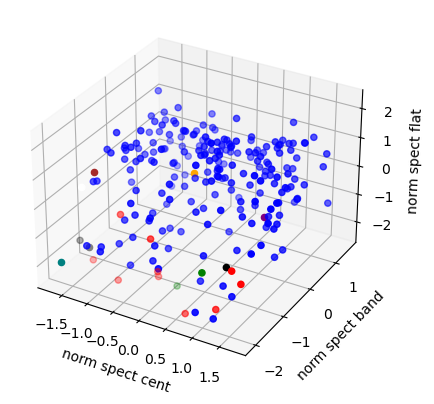

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#the lenght of this liste must be equal or greater the number of clusters
colors = ['blue', 'red', 'purple', 'green', 'orange', "white", "black", "brown", "teal", "gray"] 

for lab_val, col in zip(range(0,clusters),colors):
    ax.scatter3D(features_cleaned[predicted_labels==lab_val, 0],
                 features_cleaned[predicted_labels==lab_val, 1],
                 features_cleaned[predicted_labels==lab_val, 2],
                 c=col)

ax.set_xlabel('norm spect cent')
ax.set_ylabel('norm spect band')
ax.set_zlabel('norm spect flat')

In [23]:
dbscan = sklearn.cluster.DBSCAN()

#performing clustering
dbscan = dbscan.fit(features_cleaned)

#this will generate labels as integer numbers ranging from 0 to number of clusters -1
predicted_labels = dbscan.labels_

clusters = (len(set(predicted_labels)))

if -1 in predicted_labels: # if noisy samples were found, these are labeled as -1 and should not be considered as a cluster 
    clusters = clusters - 1
    
print("Found {} clusters".format(clusters))

print("Number of noisy samples {} out of a total of {}".format(len(predicted_labels[predicted_labels==-1]),len(predicted_labels)))

#computing scores (output is in range 0 to 1 where 1 is best)
#print('Silhouette Coefficient:',sklearn.metrics.silhouette_score(features, predicted_labels, metric='euclidean'))
#print('V Measure Score:',sklearn.metrics.v_measure_score(labels, predicted_labels))
#print('Homogeneity Score:',sklearn.metrics.homogeneity_score(labels, predicted_labels))
#print('Completeness Score:',sklearn.metrics.completeness_score(labels, predicted_labels))

Found 0 clusters
Number of noisy samples 238 out of a total of 238


# 2D feature plotting

In [35]:
#["name", "energy", "danceability", "loudness", "valence", "tempo", 
# "speechiness", "acousticness", "instrumentalness", "duration_ms", "time_signature",
# "pitch_avg", "timbre_avg", "key_change_percentage", "mode_avg"]

<IPython.core.display.Javascript object>


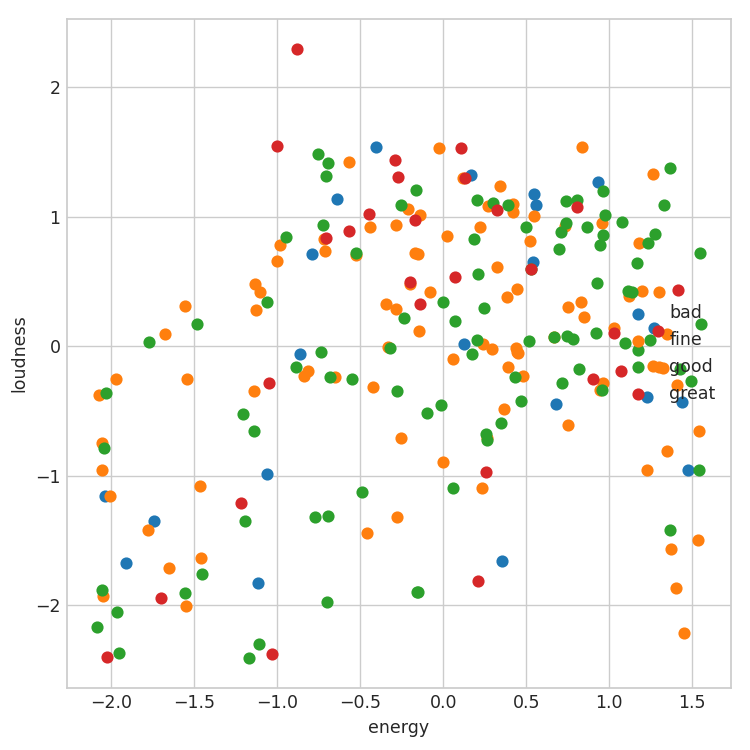

In [37]:
#Plotting the features in a 2D scatter plot
#we can plot up to 2 features (or you can attempt a 3D plot) 
#we also include an histrogram (different view of the same data)

axis1 = 1 #energy
axis2 = 2 #loudness

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    for lab_val, lab_name in zip(range(0,len(classes)),classes):
        plt.scatter(features_cleaned[labels==lab_val, axis1],
                    features_cleaned[labels==lab_val, axis2],
                    label=lab_name
                    )
    plt.xlabel("energy")
    plt.ylabel("loudness")
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


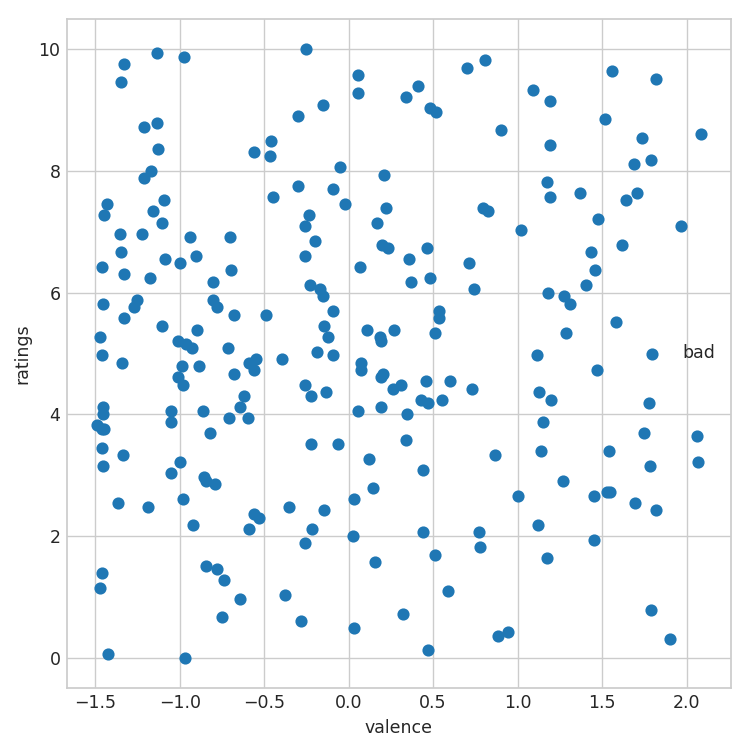

In [61]:
# with ratings 
#["name", "energy", "danceability", "loudness", "valence", "tempo", 
# "speechiness", "acousticness", "instrumentalness", "duration_ms", "time_signature",
# "pitch_avg", "timbre_avg", "key_change_percentage", "mode_avg"]

ratings = df_toptracks_features_analysis["rating"].to_numpy()

feature_index = 4

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    plt.scatter(features_cleaned[:, feature_index],
                ratings,
                label=lab_name)
    plt.xlabel("valence")
    plt.ylabel("ratings")
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()